In [1]:
%matplotlib notebook
import os
import numpy as np
from IPython.display import display

from pyccapt.calibration import variables, tools, data_tools, mc_tools
from pyccapt.calibration import widgets as wd
from pyccapt.tools.module_dir import MODULE_DIR

# The initial value for flight path length, which is the distance of local electrod to detector 
flightPathLength = 105.35 # mm 
# The initial value for t_0
t0 = 68.48 # ns




In [5]:
variables.init()
variables.path = os.path.join(os.path.split(os.path.split(MODULE_DIR)[0])[0], 'tests//data')
variables.result_path = os.path.join(os.path.split(os.path.split(MODULE_DIR)[0])[0], 'tests/results')
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
# dataset name
# dataset_name = 'AL_data_b_cropped'
dataset_name = 'OLO_AL_6_data_cropped'
# dataset_name = 'OLO_W_6_data_cropped'
# dataset_name = 'OLO_Ni_8_data_cropped'
# dataset_name = 'X6Cr17_2V30Min_5_data_cropped'
# dataset_name = 'OLO_AL_6_data_cropped'

filename = variables.path + '//' + dataset_name + '.h5'
savename = variables.result_path + '//' + dataset_name + '.h5'


head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)
print(data)

dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_startCounter = data['dld/start_counter'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

         dld/high_voltage  dld/pulse_voltage  dld/start_counter        dld/t  \
0             5229.481445        5229.481445            44078.0  4320.574290   
1             5229.481445        5229.481445            44557.0   641.243574   
2             5229.481445        5229.481445            44661.0   626.011956   
3             5229.481445        5229.481445            44715.0   628.652286   
4             5229.481445        5229.481445            45774.0   634.776480   
...                   ...                ...                ...          ...   
1909557       5708.995117        5708.995117            38530.0   607.378770   
1909558       5708.995117        5708.995117            38825.0   613.571544   
1909559       5708.995117        5708.995117            39570.0   601.151706   
1909560       5708.995117        5708.995117            40260.0   604.498410   
1909561       5708.995117        5708.995117            40610.0   599.581224   

             dld/x      dld/y  
0      

$\mathbf{\text{ Mass to charge ratio calculation () Jason T. Sebastian et al.}}<br$>
$$\frac{m}{n} = k\alpha (V_{dc} + \beta V_{pulse})(\frac{t + t_{0}}{d})^{2} $$<br>

$$\textbf{Default peaks and corresponding width of the dataset has been plotted.}$$

$$\textbf{Below plotted graph offers peak selection.You can select relevant peaks you want for compuatation.}$$

<IPython.core.display.Javascript object>


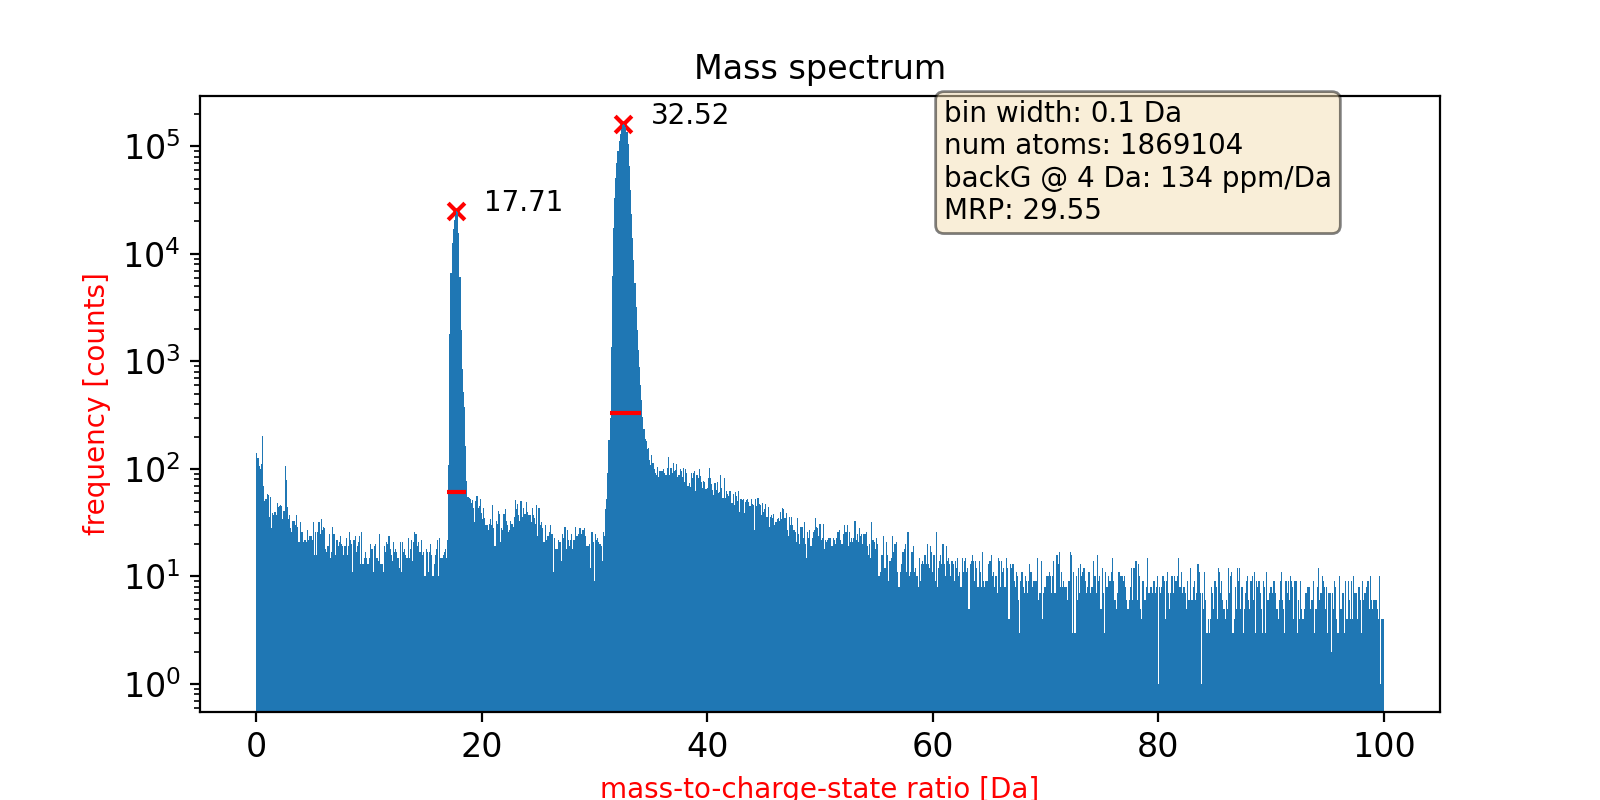

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [29.54545455]
Peaks  0 is: 17.71 peak window sides are: 17.31 - 18.01
Peaks  1 is: 32.52 peak window sides are: 31.92 - 33.02


In [6]:
mc_seb = mc_tools.tof2mc(dld_t, 0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, 110, mode='voltage_pulse')
max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, percent=50, prominence=500, plot=True, fig_name=figname, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$$\textbf{Below plotted graph offers peak selection. You can select relevant peaks you want for computation.}$$

<IPython.core.display.Javascript object>


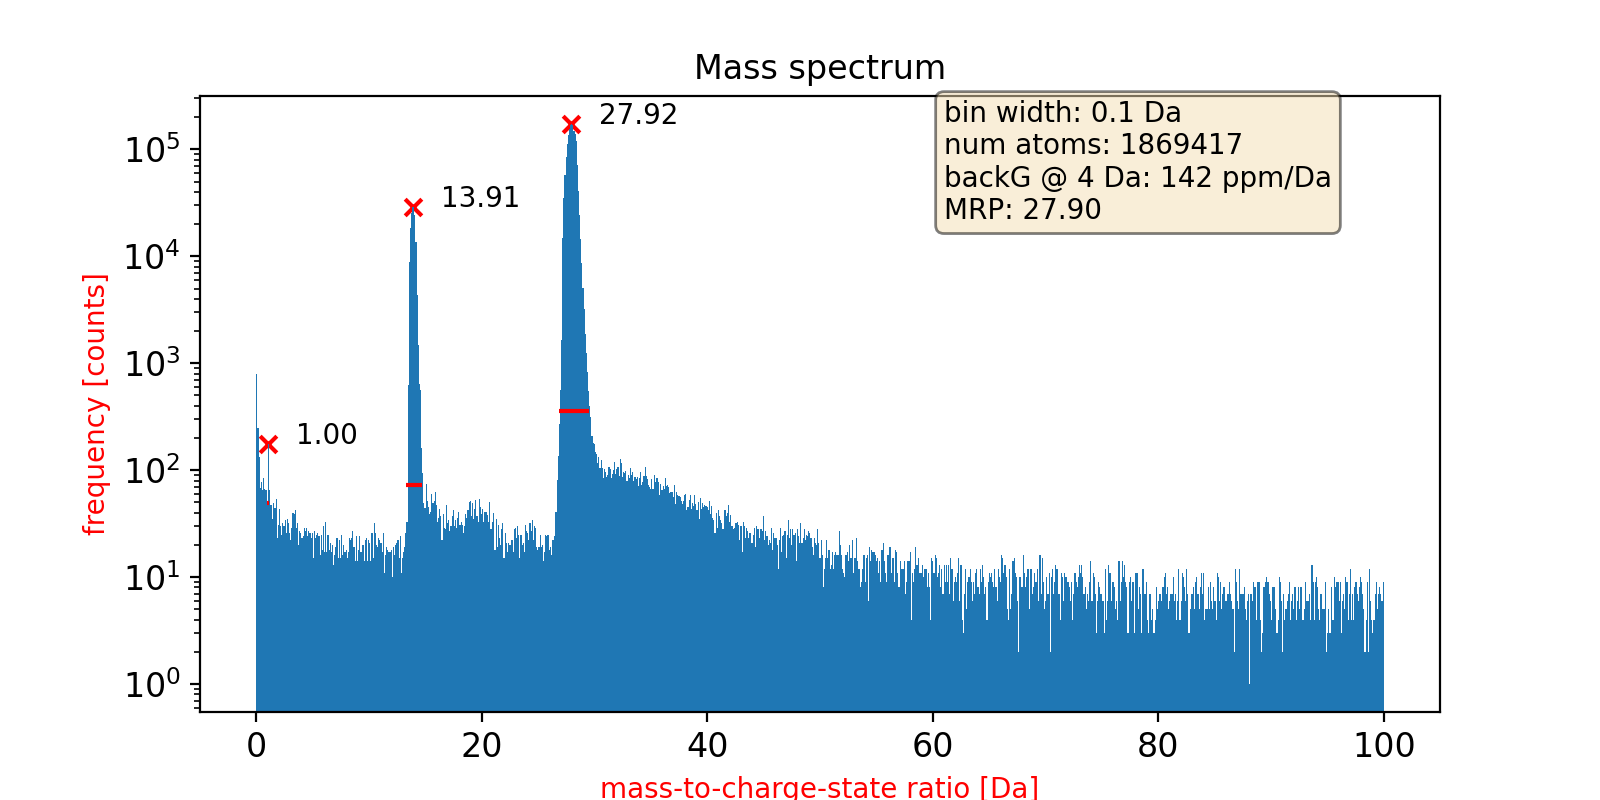

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [27.9]
Peaks  0 is: 1.00 peak window sides are: 0.90 - 1.10
Peaks  1 is: 13.91 peak window sides are: 13.51 - 14.11
Peaks  2 is: 27.92 peak window sides are: 27.42 - 28.42


In [7]:
mc_seb = mc_tools.tof2mc(dld_t, t0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')
max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, percent=50, prominence=100, plot=True, text_loc='right', fig_name=figname,)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$$\textbf{Details of selected peaks is displayed below}$$

In [12]:
print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

################ Before starting the colibration ################
Maximum pick value: [27.62334573] right-left side of the peak: [27.423176556155276, 27.723430314069386, 31115, 274364]
Mass resolving power (MRP --> m/m_2-m_1): [92.]
Peaks  0 is: 1.00 peak window sides are: 0.90 - 1.10
Peaks  1 is: 13.71 peak window sides are: 13.61 - 13.81
Peaks  2 is: 27.62 peak window sides are: 27.42 - 27.72
#################################################################


$$\textbf{User can tune/specify parameters below as per their requirements}$$

In [13]:
dld_t = dld_t - t0
mc_temp = mc_seb
mean_t = 0.3  # the threshold by user instead of total mean
mrp_final = 0
iteration = 0
break_i = 0
ionsPerFitSegment = int(len(dld_t) / 70) # choose by dividing the dataset to 70 segments
print('Ions fit per segment is:',  ionsPerFitSegment)

Ions fit per segment is: 27279


$$\textbf{Computation process based on the user-provided parameters and conditions/contsraints}$$

<IPython.core.display.Javascript object>


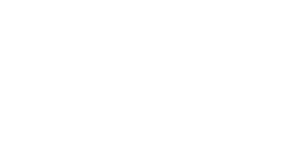

Iteration: 0
Peaks in the 2D histogram [array([26.953125]), array([29.296875])]
Maximum pick value: [27.92536243] right-left side of the peak: [27.42490790361962, 28.42581695119698, 81106, 77769]
Mass resolving power (MRP --> m/m_2-m_1): [27.9]


<IPython.core.display.Javascript object>


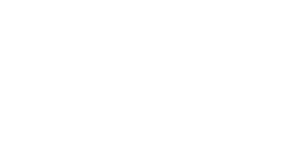

<IPython.core.display.Javascript object>


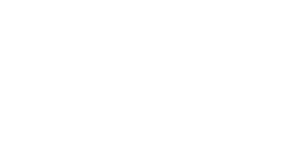

Iteration: 1
Peaks in the 2D histogram [array([27.1484375]), array([29.1015625])]
Maximum pick value: [27.72691099] right-left side of the peak: [27.62681383896222, 27.92710529373355, 32506, 251264]
Mass resolving power (MRP --> m/m_2-m_1): [92.33333333]


<IPython.core.display.Javascript object>


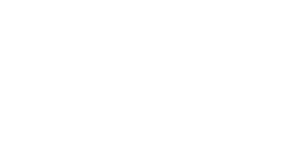

<IPython.core.display.Javascript object>


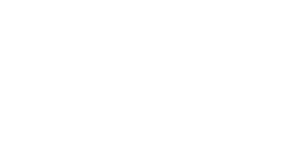

Iteration: 2
Peaks in the 2D histogram [array([26.953125]), array([28.90625])]
Maximum pick value: [27.62420661] right-left side of the peak: [27.42403120206818, 27.72429431741929, 31119, 274446]
Mass resolving power (MRP --> m/m_2-m_1): [92.]


<IPython.core.display.Javascript object>


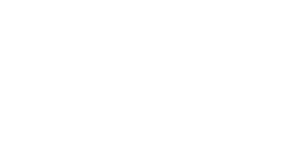

<IPython.core.display.Javascript object>


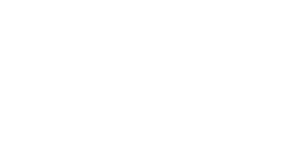

Iteration: 3
Peaks in the 2D histogram [array([26.953125]), array([28.7109375])]
Maximum pick value: [27.52019458] right-left side of the peak: [27.320047706749307, 27.62026801121908, 30991, 277437]
Mass resolving power (MRP --> m/m_2-m_1): [91.66666667]


<IPython.core.display.Javascript object>


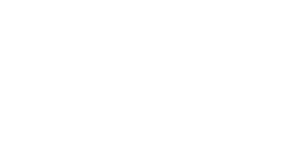

<IPython.core.display.Javascript object>


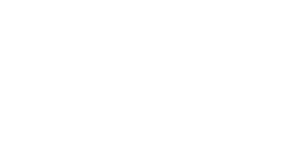

Iteration: 4
Peaks in the 2D histogram [array([26.7578125]), array([28.515625])]
Maximum pick value: [27.42379869] right-left side of the peak: [27.22362497854417, 27.523885548160465, 31794, 266368]
Mass resolving power (MRP --> m/m_2-m_1): [91.33333333]


<IPython.core.display.Javascript object>


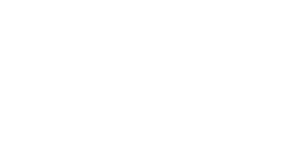

<IPython.core.display.Javascript object>


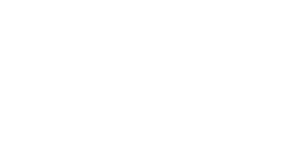

Iteration: 5
Peaks in the 2D histogram [array([26.7578125]), array([28.515625])]
Maximum pick value: [27.31788783] right-left side of the peak: [27.117756779394036, 27.417953348907623, 30844, 281680]
Mass resolving power (MRP --> m/m_2-m_1): [91.]


<IPython.core.display.Javascript object>


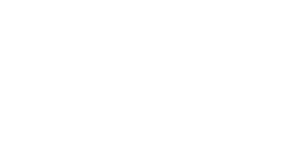

<IPython.core.display.Javascript object>


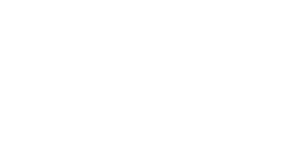

Iteration: 6
Peaks in the 2D histogram [array([26.5625]), array([28.3203125])]
Maximum pick value: [27.21934762] right-left side of the peak: [27.019205355818166, 27.319418748660592, 31617, 270913]
Mass resolving power (MRP --> m/m_2-m_1): [90.66666667]


<IPython.core.display.Javascript object>


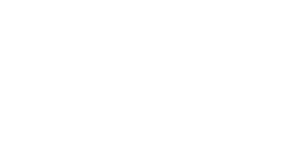

<IPython.core.display.Javascript object>


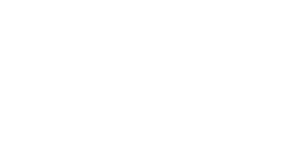

Iteration: 7
Peaks in the 2D histogram [array([26.5625]), array([28.3203125])]
Maximum pick value: [27.12589378] right-left side of the peak: [26.92570268018059, 27.22598932717145, 32241, 263390]
Mass resolving power (MRP --> m/m_2-m_1): [90.33333333]


<IPython.core.display.Javascript object>


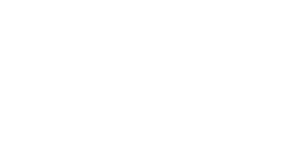

<IPython.core.display.Javascript object>


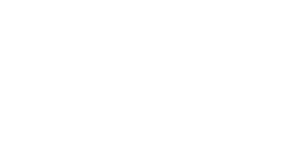

Iteration: 8
Peaks in the 2D histogram [array([26.3671875]), array([28.125])]
Maximum pick value: [27.02512247] right-left side of the peak: [26.824936375841553, 27.12521551437709, 31462, 275522]
Mass resolving power (MRP --> m/m_2-m_1): [90.]


<IPython.core.display.Javascript object>


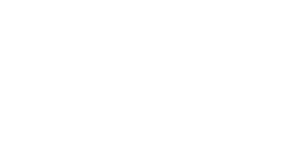

<IPython.core.display.Javascript object>


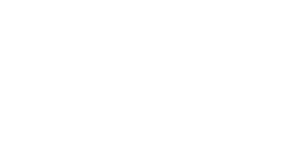

Iteration: 9
Peaks in the 2D histogram [array([26.3671875]), array([28.125])]
Maximum pick value: [26.92452272] right-left side of the peak: [26.72434039260525, 27.02461388016261, 31490, 276011]
Mass resolving power (MRP --> m/m_2-m_1): [89.66666667]


<IPython.core.display.Javascript object>


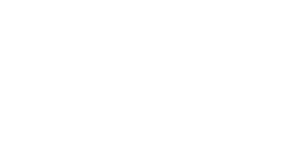

<IPython.core.display.Javascript object>


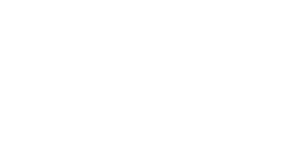

Iteration: 10
Peaks in the 2D histogram [array([26.171875]), array([27.9296875])]
Maximum pick value: [26.82522705] right-left side of the peak: [26.62503879235315, 26.92532118474811, 31644, 274771]
Mass resolving power (MRP --> m/m_2-m_1): [89.33333333]


<IPython.core.display.Javascript object>


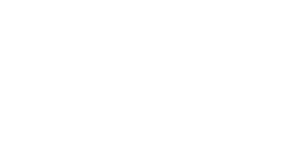

<IPython.core.display.Javascript object>


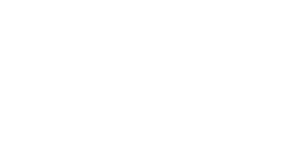

Iteration: 11
Peaks in the 2D histogram [array([26.171875]), array([27.9296875])]
Maximum pick value: [26.72544886] right-left side of the peak: [26.525258228805583, 26.825544171018475, 31627, 276092]
Mass resolving power (MRP --> m/m_2-m_1): [89.]


<IPython.core.display.Javascript object>


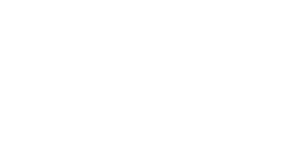

In [14]:
while True:
    fitPeak = tools.history_ex(mc_temp, dld_highVoltage, mean_t, plot=False)
    corrFac_voltage = tools.voltage_corr(dld_highVoltage, mc_temp, fitPeak, ionsPerFitSegment, plot=False)
    mc_temp2 = mc_temp / corrFac_voltage
    max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_temp2[mc_temp2 < 100], 0.1, plot=False)
    mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
    print('Iteration:', iteration)
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    corrFac_bowl = tools.bowl_corr(dld_x, dld_y, mc_temp2, mcIdeal=max_hist, mc_min=max_paek_edges[0], mc_max=max_paek_edges[1], plot=False)
    mc_temp3 = mc_temp2 / corrFac_bowl
    max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_temp3[mc_temp3 < 100], 0.1, plot=False)
    mc_temp = mc_temp3
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp
    else:
        if break_i == 10:
            break
        break_i += 1

    iteration += 1


<IPython.core.display.Javascript object>


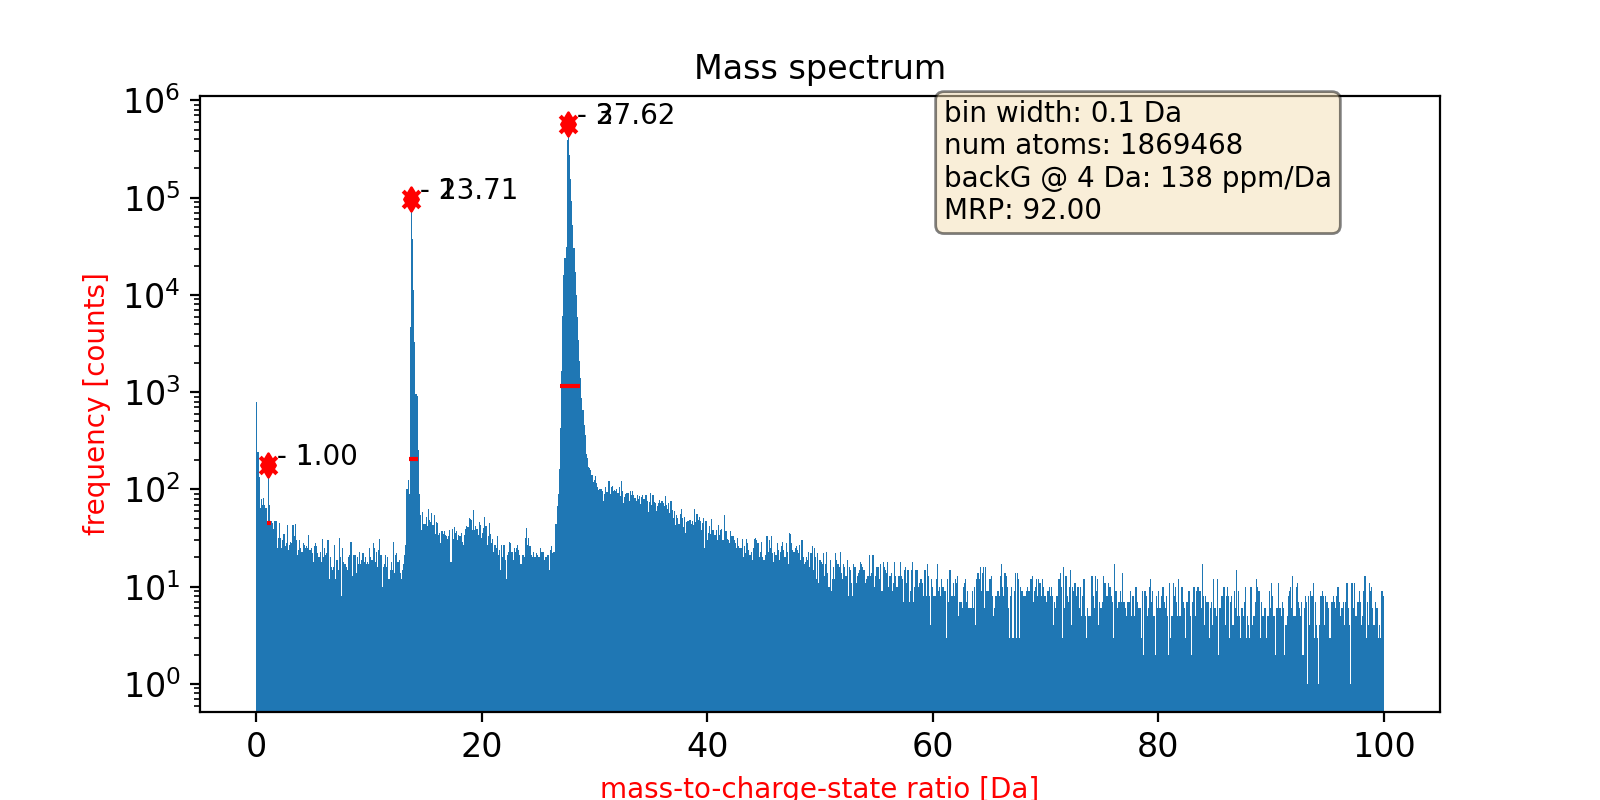

In [21]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=100, fig_name='cor_'+figname, text_loc='right')

In [16]:
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]))

Peaks  0 is: 1.00
Peaks  1 is: 13.71
Peaks  2 is: 27.62


In [19]:
isotopeTableFile = '../../files/isotopeTableNew.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList,elementIsotopeList,elementMassList,abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0],element[1],element[3]),element[2],)
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown)
display(chargeDropdown)
display(buttonAdd)
display(buttonDelete)
display(buttonReset)
listMaterial = buttonAdd.on_click(wd.onClickAdd)
buttonDelete.on_click(wd.onClickDelete)
buttonReset.on_click(wd.onClickReset)

Dropdown(description='Elements', options=(('H (1) (99.98)', 1.01), ('H (2) (0.01)', 2.01), ('He (3) (0.00)', 3…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

In [22]:
peaks_chos = []
for i in range(len(variables.peaks_idx)):
    peaks_chos.append(peaks_sides[variables.peaks_idx[i],0])
peaks_chos = np.array(peaks_chos)
listMaterial = np.array(listMaterial)
print('highest peak in the mc histogram:', peaks_chos)
print('highest peak in the ideal mc histogram:', variables.listMaterial)

highest peak in the mc histogram: [ 1.00084586 13.71158828 27.62334573]
highest peak in the ideal mc histogram: [1.01, 13.49, 26.98]


[1.0091464  0.98383934 0.97671007]


<IPython.core.display.Javascript object>


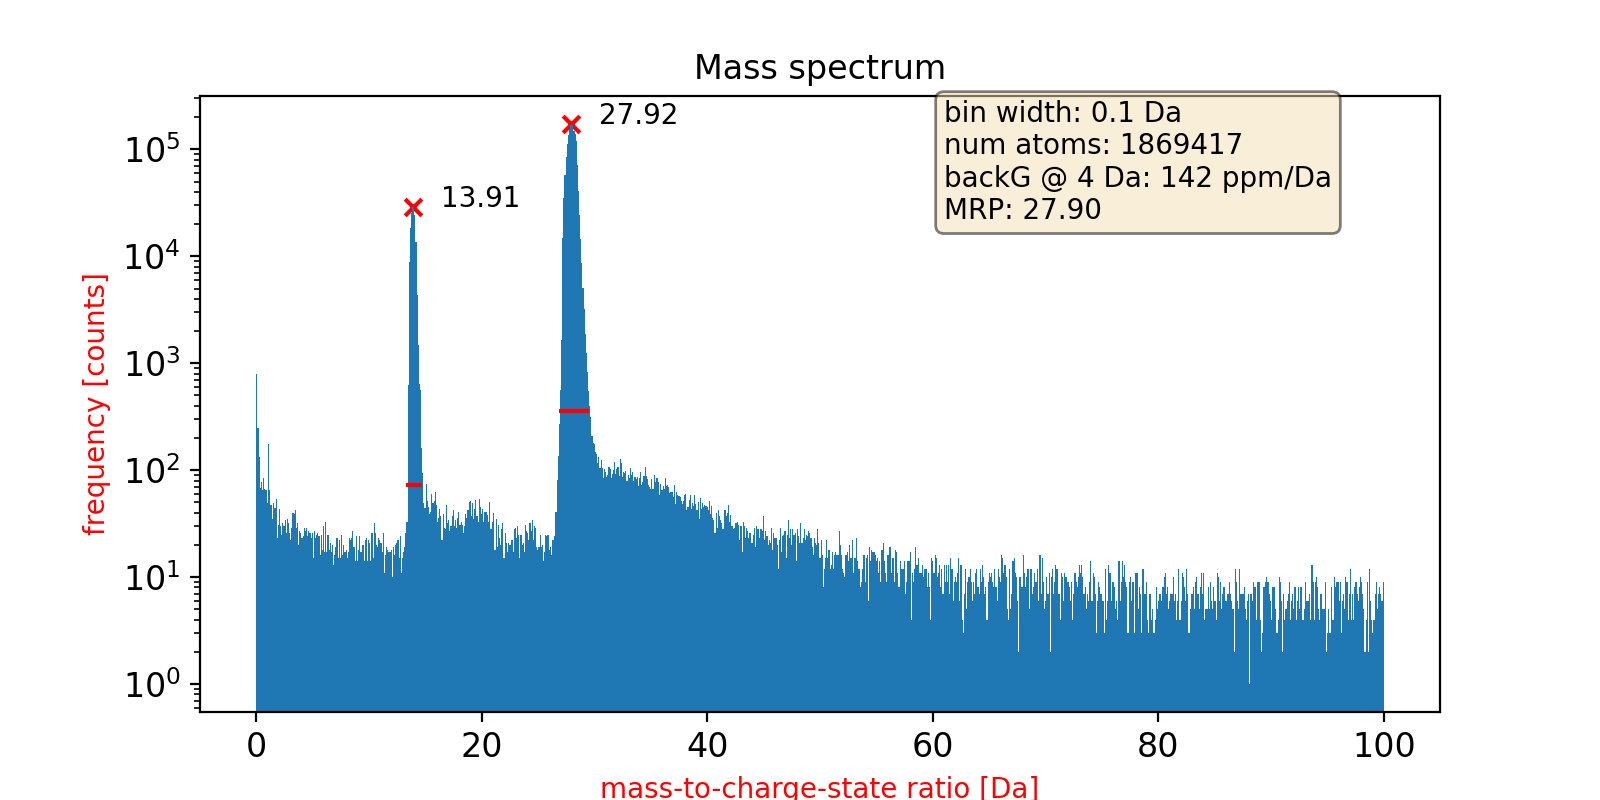

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [27.9]


<IPython.core.display.Javascript object>


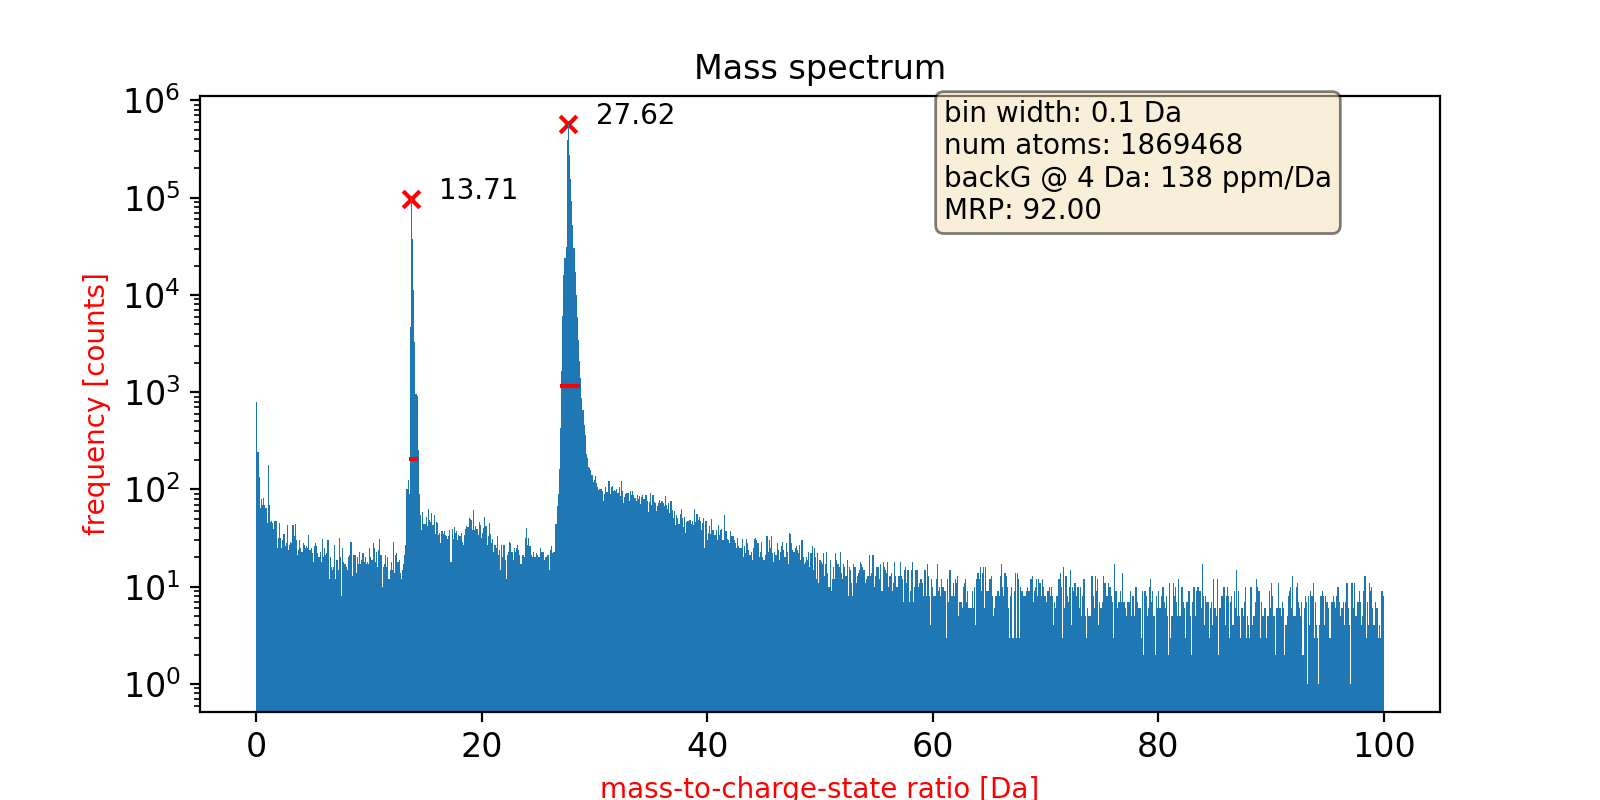

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [92.]


In [23]:
mc_final = tools.linear_correction(mc_f, peaks_chos, np.array(variables.listMaterial))

max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, plot=True)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=800, fig_name='linear_cor_'+figname, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)